The goal of making this machine learning model is to be able to predict the total daily quantity of products sold.

# Load Dataset

In [1]:
pip install pmdarima

     -------------------------------------- 569.7/569.7 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, only disable specific warnings based on category
# Example: Disabling DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv("df_kalbe.csv")

In [5]:
df.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid,storeid.1,storename,...,latitude,longitude,productid.1,Product Name,price.1,customerid.1,age,gender,Marital Status,income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,12,Prestasi Utama,...,"-2,990934","104,756554",P3,Crackers,7500,328,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,1,Prima Tendean,...,"-6,2","106,816666",P9,Yoghurt,10000,165,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,4,Gita Ginara,...,"-6,966667","110,416664",P1,Choco Bar,8800,183,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,4,Gita Ginara,...,"-6,966667","110,416664",P1,Choco Bar,8800,160,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,4,Gita Ginara,...,"-6,966667","110,416664",P9,Yoghurt,10000,386,33,0,Married,"6,95"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   productid       5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   storeid.1       5020 non-null   int64 
 9   storename       5020 non-null   object
 10  groupstore      5020 non-null   object
 11  Type            5020 non-null   object
 12  latitude        5020 non-null   object
 13  longitude       5020 non-null   object
 14  productid.1     5020 non-null   object
 15  Product Name    5020 non-null   object
 16  price.1         5020 non-null   int64 
 17  customerid.1    5020 non-null   int64 
 18  age     

In [7]:
df = df.drop(["storeid.1", "productid.1", "price.1", "customerid.1"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   productid       5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   storename       5020 non-null   object
 9   groupstore      5020 non-null   object
 10  Type            5020 non-null   object
 11  latitude        5020 non-null   object
 12  longitude       5020 non-null   object
 13  Product Name    5020 non-null   object
 14  age             5020 non-null   int64 
 15  gender          5020 non-null   int64 
 16  Marital Status  4976 non-null   object
 17  income          5020 non-null   object
dtypes: int64

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Total Quantity Per Day

In [16]:
df_totalquantity = df.groupby('Date')["qty"].sum().reset_index()

In [17]:
df_totalquantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [18]:
df_totalquantity.set_index('Date', inplace=True)

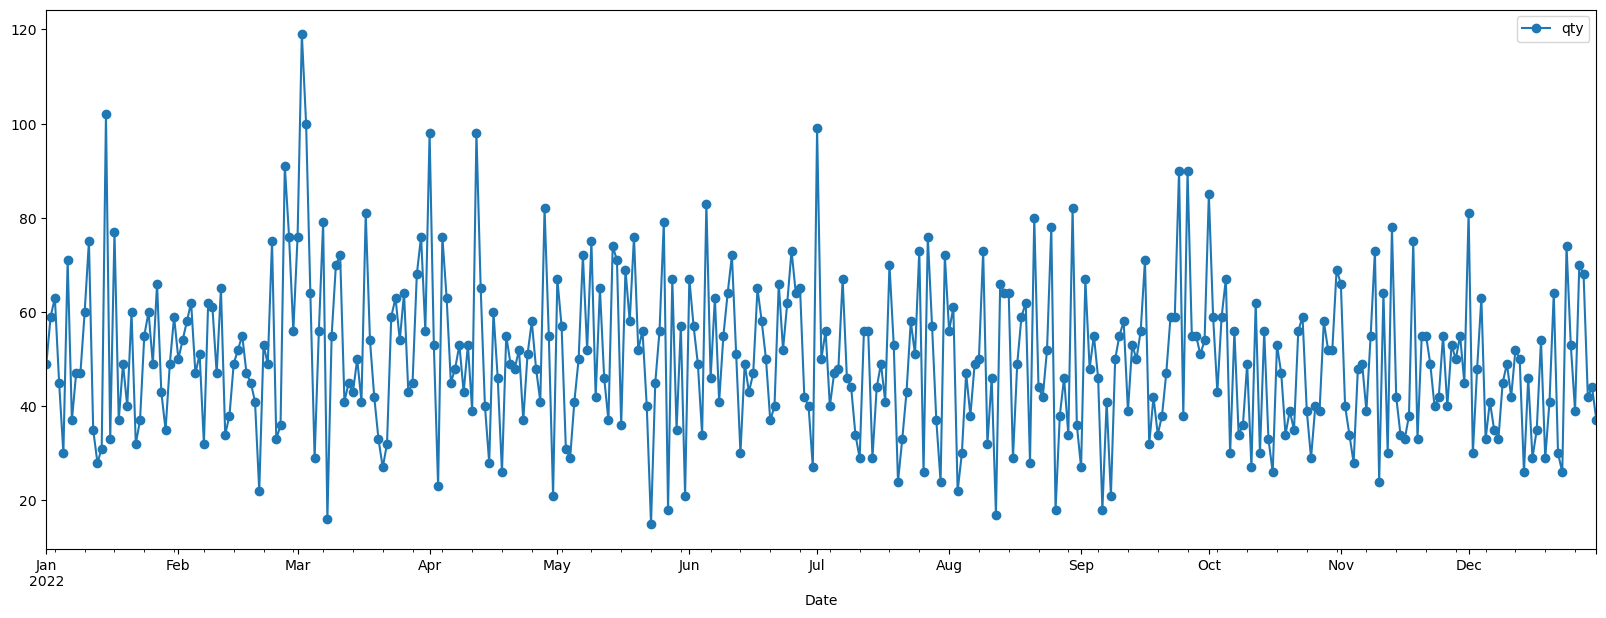

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
df_totalquantity.plot(marker='o')
plt.show()

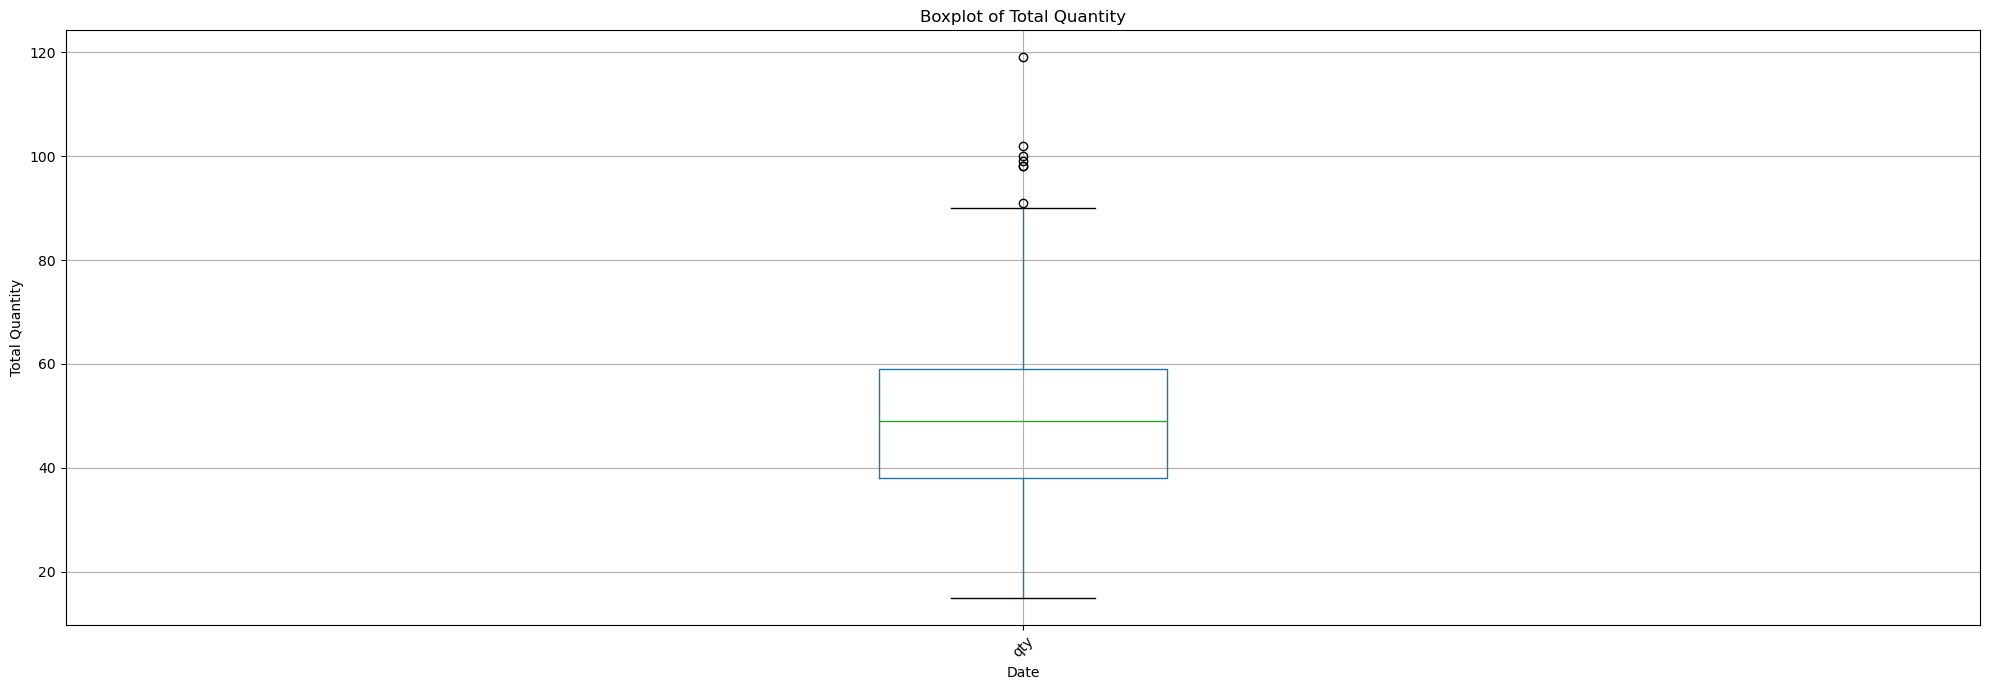

In [20]:
df_totalquantity.boxplot()
plt.title('Boxplot of Total Quantity')
plt.ylabel('Total Quantity')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [23]:
adfuller_test(df_totalquantity['qty'])

ADF Test Statistic : -19.448086319449096
p-value : 0.0
#Lags Used : 0
Number of Observations : 364
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


# Choose p, d, and q

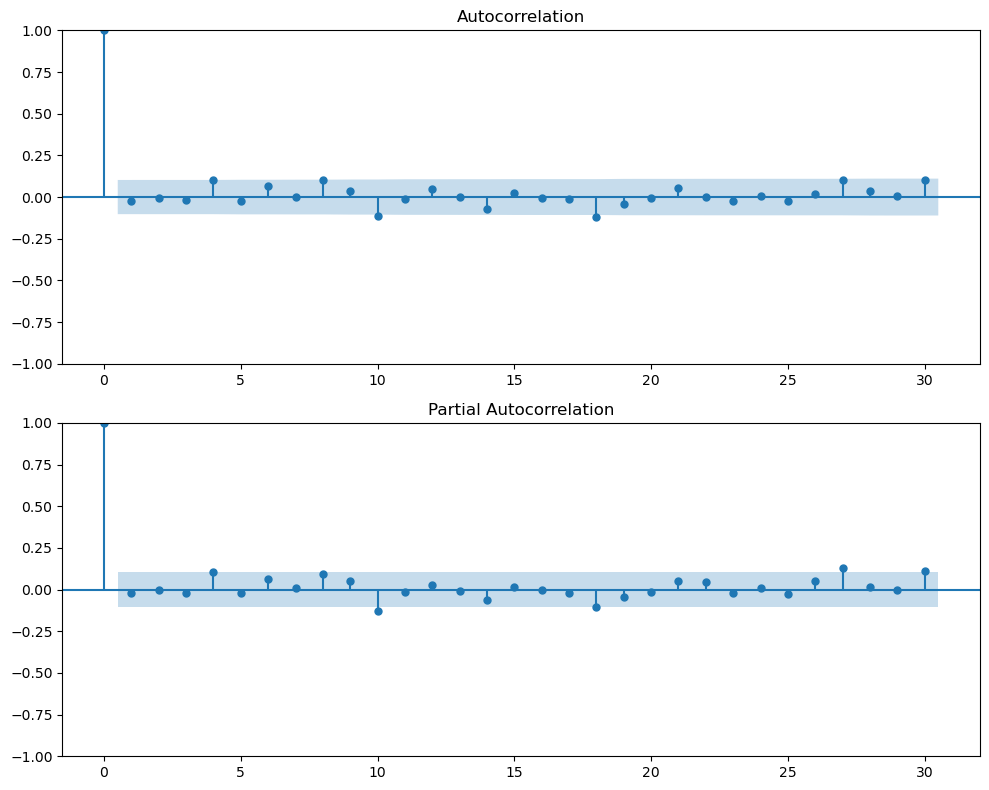

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_totalquantity['qty'], lags=30, ax=ax1)
plot_pacf(df_totalquantity['qty'], lags=30, ax=ax2)

plt.tight_layout()
plt.show()

In [26]:
aic_scores = []
# Fit the ARIMA model
model = ARIMA(df_totalquantity['qty'], order=(4,0,4))
model_fit = model.fit()
# Add AIC score to the list
aic_scores.append({'par': '(4,0,4)', 'aic': model_fit.aic})

In [27]:
aic_scores

[{'par': '(4,0,4)', 'aic': 3101.71782207617}]

In [28]:
from itertools import product

# Define ranges for p, d, and q
p = range(0, 5)  # 0 to 7
d = range(0, 3)  # 0 to 2
q = range(0, 5)  # 0 to 7

# Use the product function from itertools
# to create combinations of p, d, and q
pdq = list(product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]


In [30]:
# Splitting data into training and testing with ratio 8 : 2
data_train = df_totalquantity[:292]["qty"]
data_test = df_totalquantity[292:]['qty']

# Creating a list to store AIC scores
aic_scores = []

# Performing manual grid search to find optimal p, d, q
for param in pdq:
    # Fitting the ARIMA model
    model = ARIMA(data_train, order=param)
    model_fit = model.fit()
    # Adding AIC score to the list
    aic_scores.append({'par': param, 'aic': model_fit.aic})

# Finding the smallest AIC score
best_aic = min(aic_scores, key=lambda x: x['aic'])

print(best_aic)

# Creating an ARIMA model with the best p, d, and q from grid search
model = ARIMA(data_train, order=(best_aic['par']))
model_fit = model.fit()

# Making predictions for the next 73 days (testing data)
preds = model_fit.forecast(73)

{'par': (2, 1, 3), 'aic': 2489.2072013754446}


<Axes: >

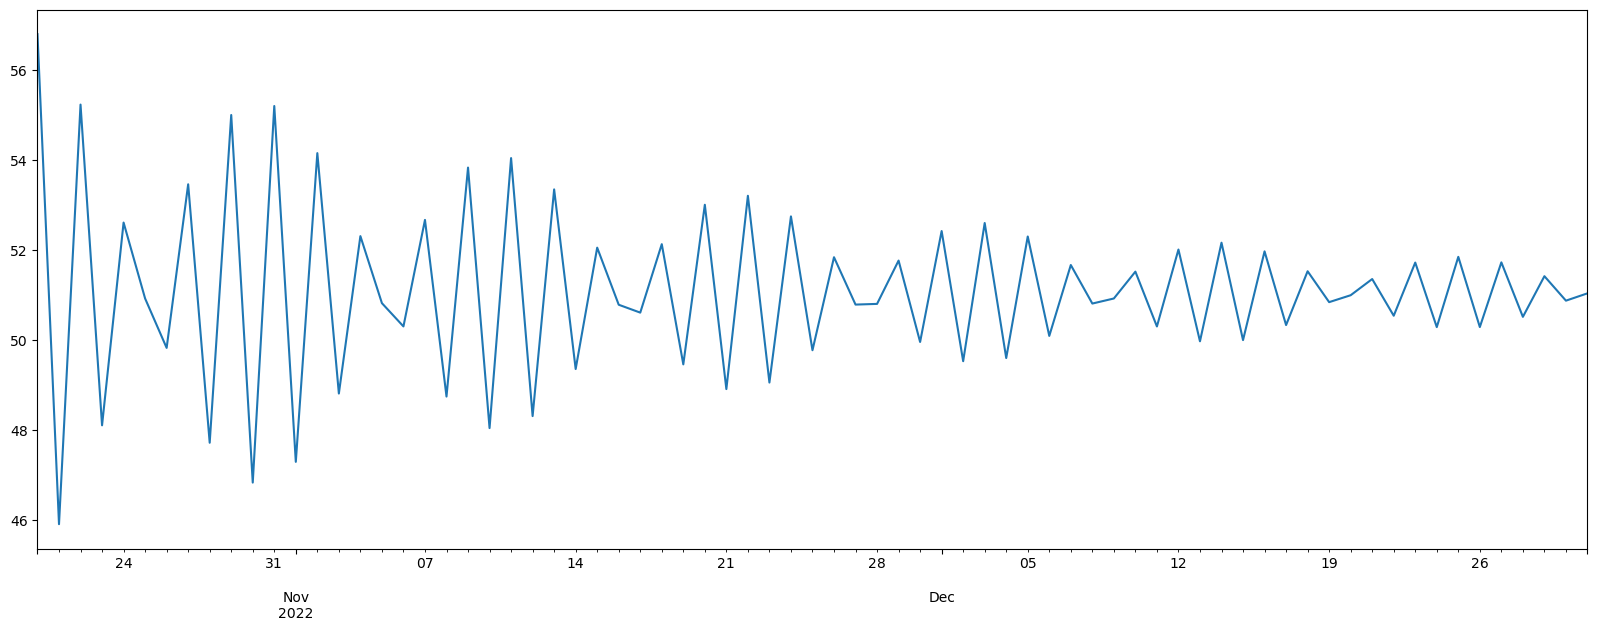

In [31]:
preds.plot()

In [32]:
import pmdarima as pm

auto_arima = pm.auto_arima(data_train,stepwise=False, seasonal=False)
forecast = auto_arima.predict(n_periods=73)

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1249.469
Date:                Sun, 01 Oct 2023   AIC                           2504.937
Time:                        20:45:50   BIC                           2515.968
Sample:                    01-01-2022   HQIC                          2509.356
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.08e-05   3.25e+04      0.000       1.000       1.000
ma.L1         -0.9898      0.015    -66.556      0.000      -1.019      -0.961
sigma2       298.6887     22.254     13.422      0.000     255.072     342.306
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                18.30
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.53
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

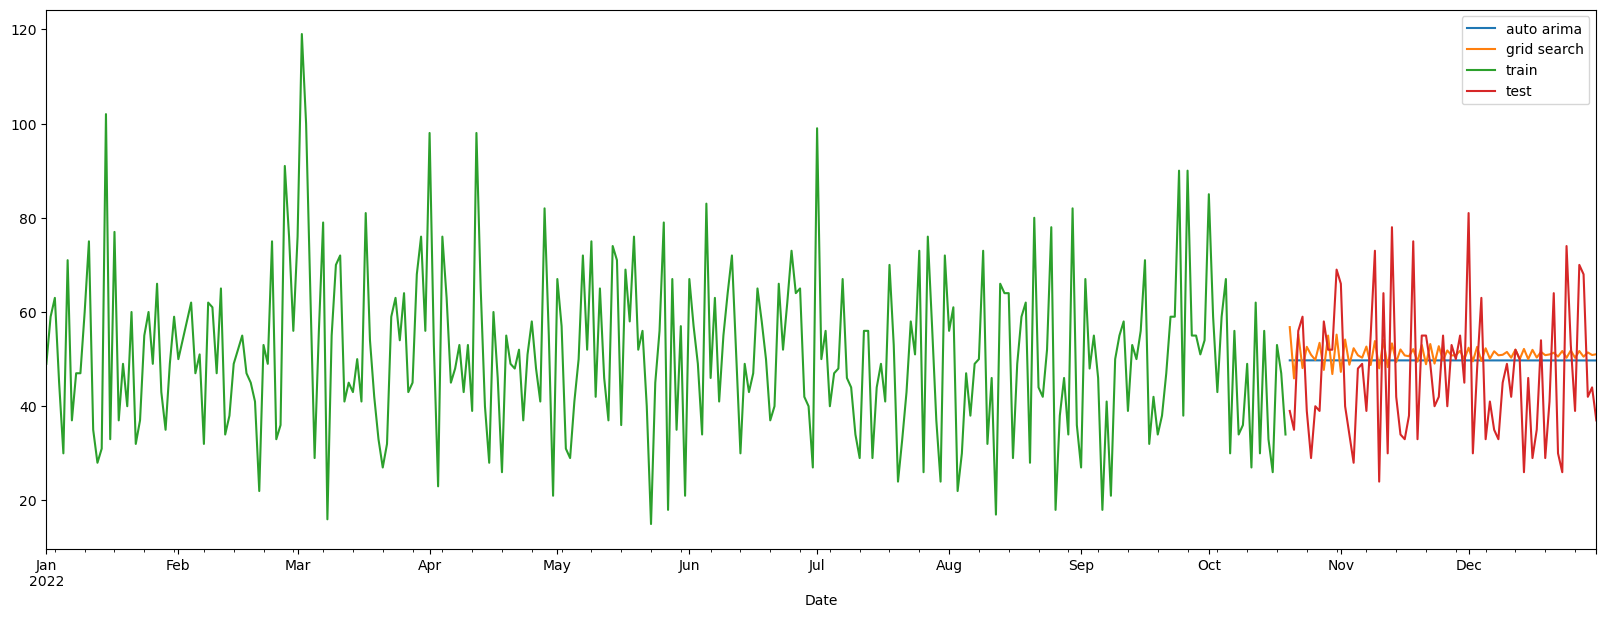

In [33]:
# ploting
forecast.plot(label='auto arima')
preds.plot(label='grid search')

data_train.plot(label='train')
data_test.plot(label='test')
plt.legend()

# Evaluate Model

In [34]:
# Calculate RMSE for training data
train_predictions = model_fit.predict(start=data_train.index[0], end=data_train.index[-1])
train_rmse = np.sqrt(mean_squared_error(data_train, train_predictions))

# Calculate RMSE for testing data
test_rmse = np.sqrt(mean_squared_error(data_test, preds))

print(f"RMSE for Training Data: {train_rmse:.2f}")
print(f"RMSE for Testing Data: {test_rmse:.2f}")

RMSE for Training Data: 17.27
RMSE for Testing Data: 14.37


<Axes: xlabel='Date'>

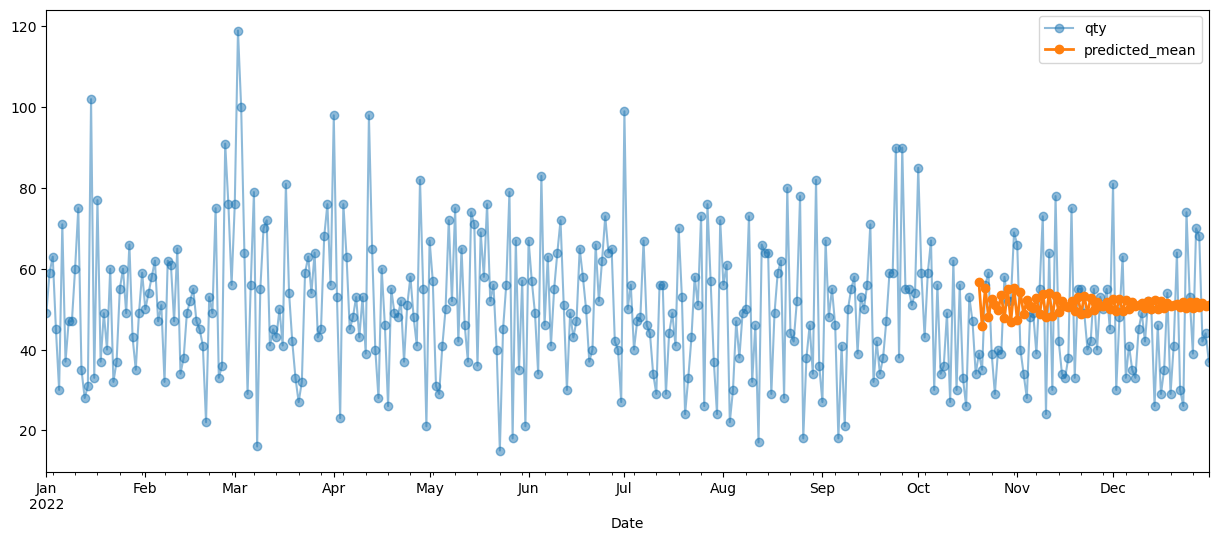

In [35]:
df_totalquantity.plot(figsize=(15, 6), alpha=0.5, marker="o")
preds.plot(linewidth=2, marker="o", legend=True)

The parameter values p = 2, d = 1, and q = 3 resulted in an RMSE value of 14.37 dan RMSE for Training Data is 17.27.

The difference between the RMSE values for training (17.27) and testing (14.37) is not too large suggests that the model is not overfitting. A smaller difference indicates that the model is generalizing reasonably well to unseen data.

<Axes: >

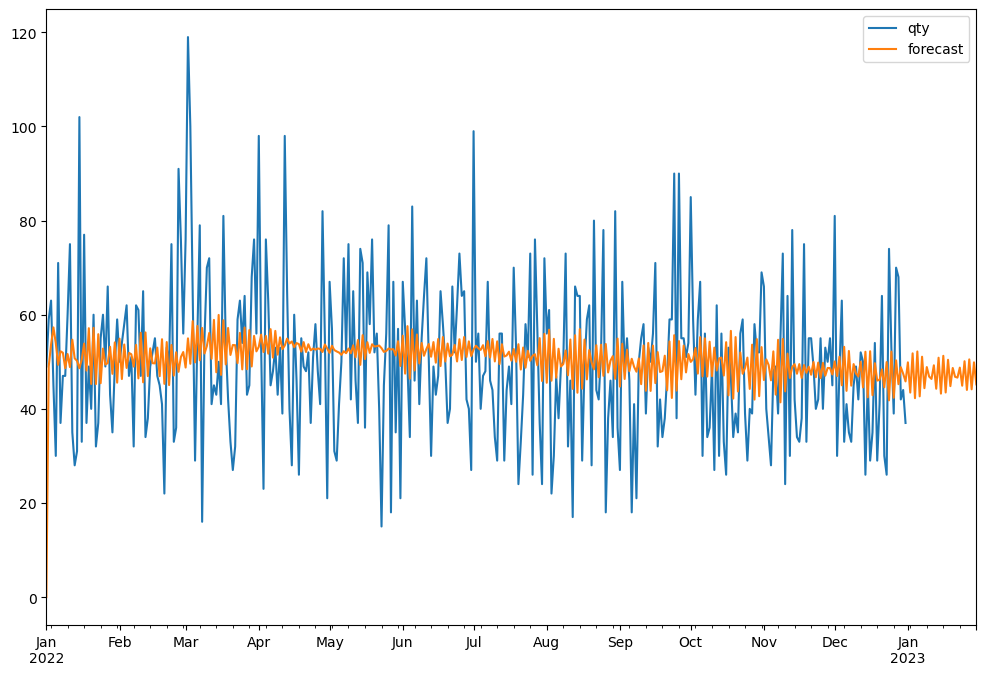

In [37]:
from pandas.tseries.offsets import DateOffset

future_dates=[df_totalquantity.index[-1]+ DateOffset(days=x)for x in range(0,31)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df_totalquantity.columns)

future_df = pd.concat([df_totalquantity,future_dates_df])

model=ARIMA(df_totalquantity['qty'], order=(2,1,3))
model_fit=model.fit()

future_df['forecast'] = model_fit.predict(start = 0, end = 395, dynamic = False)
future_df[['qty', 'forecast']].plot(figsize=(12, 8))

In [38]:
future_df.tail(30).mean()

qty               NaN
forecast    47.237918
dtype: float64

In [40]:
import pickle

# Creating an ARIMA model with the best p, d, and q from grid search
model = ARIMA(df_totalquantity['qty'], order=best_aic['par'])
model_fit = model.fit()

# Save the model to a file using pickle
model_filename = 'arima_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model_fit, model_file)

print("Model saved successfully!")

Model saved successfully!


In [42]:
import pickle
# Load the ARIMA model from the file
model_filename = 'arima_model.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_model_fit = pickle.load(model_file)

# Number of days for prediction
num_days = 30

# Forecast the next 30 days
forecast = loaded_model_fit.forecast(steps=num_days)

print("Forecasted quantities for the next", num_days, "days:")
print(forecast)

Forecasted quantities for the next 30 days:
2023-01-01    49.881334
2023-01-02    43.458709
2023-01-03    51.793964
2023-01-04    42.268815
2023-01-05    52.195091
2023-01-06    42.658380
2023-01-07    51.074771
2023-01-08    44.394645
2023-01-09    48.881224
2023-01-10    46.856993
2023-01-11    46.352532
2023-01-12    49.251940
2023-01-13    44.273505
2023-01-14    50.864356
2023-01-15    43.236303
2023-01-16    51.266744
2023-01-17    43.476496
2023-01-18    50.426709
2023-01-19    44.828351
2023-01-20    48.687772
2023-01-21    46.804034
2023-01-22    46.638572
2023-01-23    48.763867
2023-01-24    44.917932
2023-01-25    50.119769
2023-01-26    44.019126
2023-01-27    50.508288
2023-01-28    44.152221
2023-01-29    49.883436
2023-01-30    45.201655
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
forecast.plot()